In [16]:
import numpy as np

import utils
from MLP import MLP

import matplotlib.pyplot as plt

# Load Data

In [17]:
gaussian_quantiles = utils.load_data()
X, Y = gaussian_quantiles

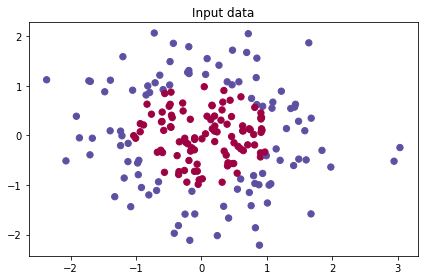

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.title("Input data")
plt.tight_layout()
plt.show()

# Model Training

In [19]:
# Turn Y to One Hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(Y.reshape(-1,1))
one_hot_Y = encoder.transform(Y.reshape(-1,1))

In [20]:
# Model define
nn = MLP(n_in=2, n_hidden=5, n_out=2)

In [21]:
# Training
nn.train(X=X, Y=one_hot_Y, epochs=10*1000, learning_rate=0.1)

Loss  0  =  0.6931488876092763
Loss  1000  =  0.6931424464882389
Loss  2000  =  0.6931234127978395
Loss  3000  =  0.6930763880908032
Loss  4000  =  0.6930122211972205
Loss  5000  =  0.6923448207897422
Loss  6000  =  0.5248627796569958
Loss  7000  =  0.1910060436039729
Loss  8000  =  0.13567274345155134
Loss  9000  =  0.12174863622067346


In [22]:
# Prediction accuracy
np.sum(nn.predict(X) == Y) / Y.shape[0]

0.95

# Result Visualization

In [30]:
def show_predictions(model, X, Y, name=""):
    """ display the labeled data X and a surface of prediction of model """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_temp = np.c_[xx.flatten(), yy.flatten()]
    Z = model.predict(X_temp)

    plt.figure()
    plt.contourf(xx, yy, Z.reshape(xx.shape))
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1],c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title("Predictions " + name)
    plt.tight_layout()
    plt.show()

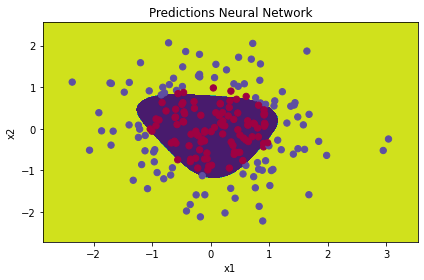

In [31]:
show_predictions(nn, X, Y, "Neural Network")